In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving clean_kaggle_data.csv to clean_kaggle_data (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['clean_kaggle_data.csv']))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (285) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df[:5]
#Q25---Salary
#Q6---professional experience
#Q4---education
#Q3---country
#Q2---Gender
#Q1---age

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,...,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,Notepad++,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,...,NaN,NaN,Qlik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,NaN,NaN,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,Other,Kaggle Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DataRobot AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,MATLAB,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


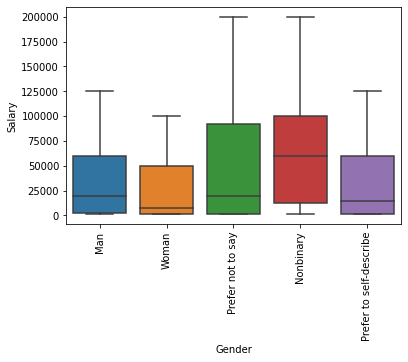

In [ ]:
#plotting salary vs gender

sns.boxplot(x="Q2", y="Q25", showfliers = False, data=df)
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

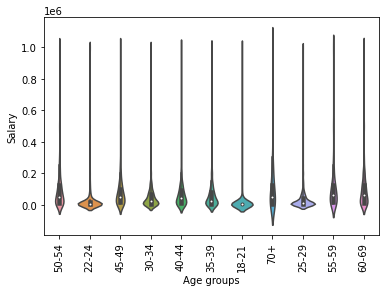

<Figure size 864x432 with 0 Axes>

In [ ]:
#plotting salary vs age
sns.violinplot(x="Q1",y ="Q25",data = df)
plt.xticks(rotation = 90)
plt.xlabel('Age groups')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.figure(figsize=(12,6))
plt.show()

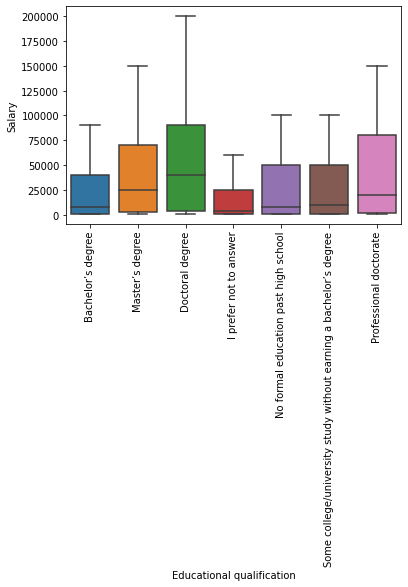

In [ ]:
#plotting salary vs educational qualification

sns.boxplot(x="Q4", y="Q25", showfliers = False, data=df)
plt.xlabel('Educational qualification')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
adf=df[['Q2','Q25']]
adf.dropna()
adf.groupby('Q2').mean()


,Q25
Q2,
Man,51193.600696
Nonbinary,121478.723404
Prefer not to say,75765.306122
Prefer to self-describe,74166.666667
Woman,34816.881547


In [ ]:
#finding frequency of the categories of data
adf.Q2.value_counts()

Man                        12642
Woman                       2482
Prefer not to say            196
Nonbinary                     47
Prefer to self-describe       24
Name: Q2, dtype: int64

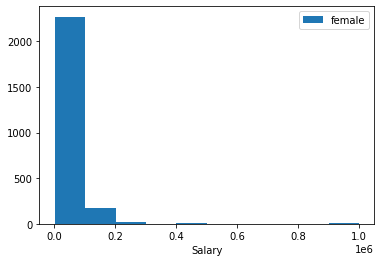

count       2482.000000
mean       34816.881547
std        72017.347888
min         1000.000000
25%         1000.000000
50%         7500.000000
75%        50000.000000
max      1000000.000000
Name: Q25, dtype: float64


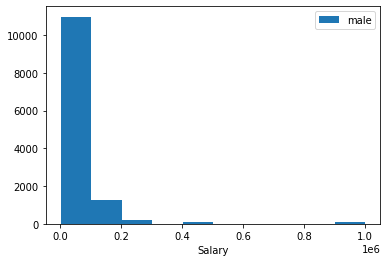

count      12642.000000
mean       51193.600696
std        99979.274378
min         1000.000000
25%         2000.000000
50%        20000.000000
75%        60000.000000
max      1000000.000000
Name: Q25, dtype: float64


In [ ]:
#Sorting our data

female_card = adf[adf['Q2'] == 'Woman']['Q25']
male_card = adf[adf['Q2'] == 'Man']['Q25']

plt.hist(female_card,label = 'female')
plt.xlabel('Salary')
plt.legend()
plt.show()
f=female_card.describe()
print(f)

plt.hist(male_card,label = 'male')
plt.xlabel("Salary")
plt.legend()
plt.show()
m=male_card.describe()
print(m)


In [ ]:
#T-test on skewed dataset
td, pd      = stats.ttest_ind(female_card, male_card)
print ("t-test: t = %g  p = %g" % (td, pd))

t-test: t = -7.77406  p = 8.08881e-15


**As we can see from the distributions, neither of our data is normal so we won't get accurate results from our t-test. We will have to bootstrap the data.**


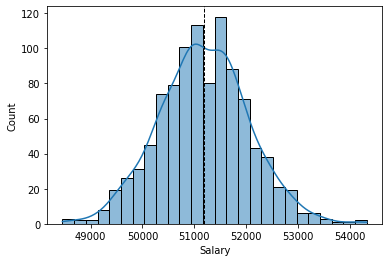

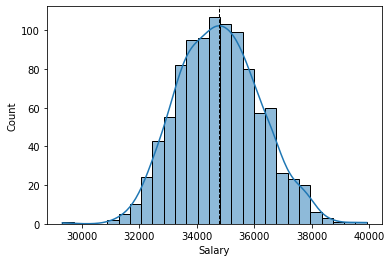

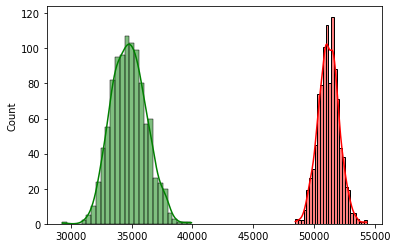

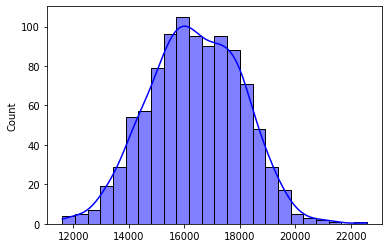

In [ ]:
#Bootstrapping
male_boot=[]
female_boot=[]
np.random.seed(0)
for _ in range(1000):
    x = np.random.choice(male_card, size=12642, replace=True)
    male_boot.append(x.mean())

sns.histplot(male_boot,kde = True, label = 'Male')
plt.axvline(np.array(male_boot).mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Salary')
plt.show()

np.random.seed(0)
for _ in range(1000):
    y = np.random.choice(female_card, size=2482, replace=True)
    female_boot.append(y.mean())

sns.histplot(female_boot, kde = True, label ='Female' )
plt.axvline(np.array(female_boot).mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Salary')
plt.show()

sns.histplot(male_boot,kde = True, color = 'red')
sns.histplot(female_boot,kde = True, color = 'green')
plt.show()

array1 = np.array(male_boot)
array2 = np.array(female_boot)
subtracted_array = np.subtract(array1, array2)
subtracted = list(subtracted_array)
sns.histplot(subtracted,kde = True, color = 'blue')
plt.show()

**Now that our data looks similar to a normal curve, we can do the t test**

In [ ]:
# T test
td, pd      = stats.ttest_ind(female_boot, male_boot)
print ("t-test: t = %g  p = %g" % (td, pd))

t-test: t = -311.791  p = 0


**Since our P value is less than 0.05,we can say that it is statistically significant.We get a p value of 0 which means that the groups are signifacantly different from each other and the values of one group cannot be explained by the other**

In [ ]:
#part 3
#Looking at the data

edf=df[['Q4','Q25']]
edf.dropna()
edf.groupby('Q4').mean()

,Q25
Q4,
Bachelor’s degree,35578.291815
Doctoral degree,70641.181777
I prefer not to answer,34191.616766
Master’s degree,52706.868657
No formal education past high school,38208.333333
Professional doctorate,67465.517241
Some college/university study without earning a bachelor’s degree,41990.616622


In [ ]:
#Cleaning the column

edf.drop(edf.index[edf.Q4 == 'No formal education past high school'], inplace = True)
edf.drop(edf.index[edf.Q4 == 'I prefer not to answer'], inplace = True)
edf.drop(edf.index[edf.Q4 == 'Some college/university study without earning a bachelor’s degree'], inplace = True)
edf.drop(edf.index[edf.Q4 == 'Professional doctorate'], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
edf.groupby('Q4').mean()

#now we have only 3 types of values

,Q25
Q4,
Bachelor’s degree,35578.291815
Doctoral degree,70641.181777
Master’s degree,52706.868657


In [ ]:
#looking at frequency of each category for sample size

edf.Q4.value_counts()

Master’s degree      6799
Bachelor’s degree    4777
Doctoral degree      2217
Name: Q4, dtype: int64

count       4777.000000
mean       35578.291815
std        89382.060777
min         1000.000000
25%         1000.000000
50%         7500.000000
75%        40000.000000
max      1000000.000000
Name: Q25, dtype: float64 count       6799.000000
mean       52706.868657
std        90928.786678
min         1000.000000
25%         3000.000000
50%        25000.000000
75%        70000.000000
max      1000000.000000
Name: Q25, dtype: float64 count       2217.000000
mean       70641.181777
std       117160.947589
min         1000.000000
25%         4000.000000
50%        40000.000000
75%        90000.000000
max      1000000.000000
Name: Q25, dtype: float64


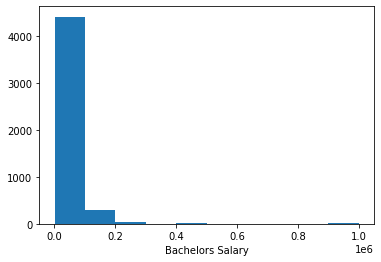

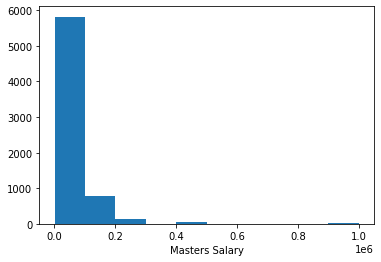

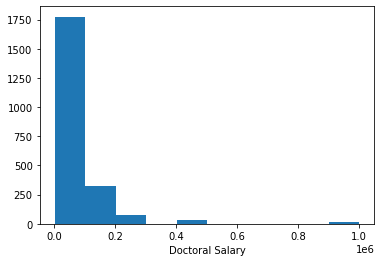

In [ ]:
# Sorting the data

bac= edf[edf.Q4== 'Bachelor’s degree']['Q25']
mas = edf[edf.Q4== 'Master’s degree']['Q25']
doc = edf[edf.Q4== 'Doctoral degree']['Q25']
a=bac.describe()
b=mas.describe()
c=doc.describe()
print(a,b,c)
plt.hist(bac)
plt.xlabel('Bachelors Salary')
plt.show()
plt.hist(mas)
plt.xlabel('Masters Salary')
plt.show()
plt.hist(doc)
plt.xlabel('Doctoral Salary')
plt.show()

5.107696325253651e-48
109.75776160573479


(array([1774.,  321.,   74.,    0.,   31.,    0.,    0.,    0.,    0.,
          17.]),
 array([   1000.,  100900.,  200800.,  300700.,  400600.,  500500.,
         600400.,  700300.,  800200.,  900100., 1000000.]),
 <a list of 10 Patch objects>)

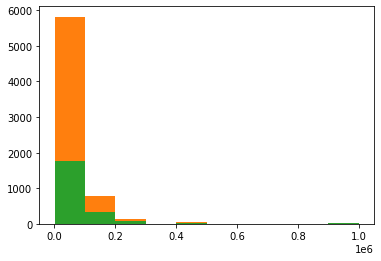

In [ ]:
#anova on non normal data
fvalue, pvalue = stats.f_oneway(bac,mas,doc)
print(pvalue)
print(fvalue)
plt.hist(bac)
plt.hist(mas)
plt.hist(doc)

We see that our data doesn't follow a normal curve,so we won't get accurate results from our t-test.Therefore we do bootstrapping.

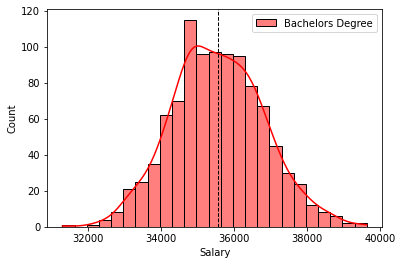

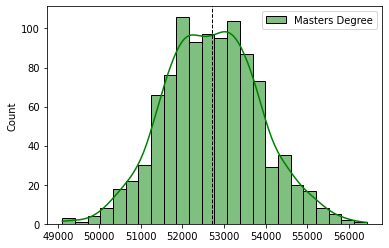

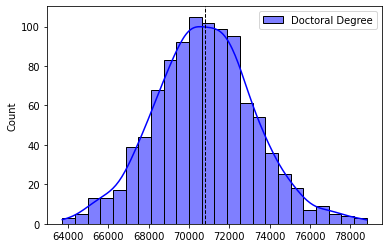

In [ ]:
#Bootstrapping

bac_boot=[]
mas_boot=[]
doc_boot=[]
np.random.seed(0)
for _ in range(1000):
    b = np.random.choice(bac, size=4777, replace=True)
    bac_boot.append(b.mean())

sns.histplot(bac_boot, kde = True, color = 'red', label = 'Bachelors Degree')
plt.axvline(np.array(bac_boot).mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Salary')
plt.legend()
plt.show()

np.random.seed(0)
for _ in range(1000):
    m = np.random.choice(mas, size=6799, replace=True)
    mas_boot.append(m.mean())

sns.histplot(mas_boot, kde = True, color = 'green',label = 'Masters Degree')
plt.axvline(np.array(mas_boot).mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

np.random.seed(0)
for _ in range(1000):
    d = np.random.choice(doc, size=2217, replace=True)
    doc_boot.append(d.mean())

sns.histplot(doc_boot, kde = True, color = 'blue',label = 'Doctoral Degree')
plt.axvline(np.array(doc_boot).mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

P value: 0.0
F value: 103515.83483168304


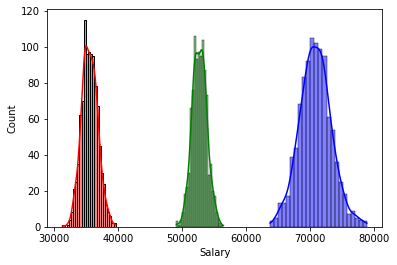

In [ ]:
#Anova

fvalue, pvalue = stats.f_oneway(bac_boot,mas_boot,doc_boot)
print("P value:",pvalue)
print("F value:",fvalue)
sns.histplot(bac_boot,kde = True,color = 'red', label = "Bachelors degree")
sns.histplot(mas_boot,kde = True, color = 'green', label = "Masters degree")
sns.histplot(doc_boot,kde = True,color = 'blue',label = "Doctoral degree")
plt.xlabel('Salary')
plt.show()

**We get a p value of 0 which means that the groups are signifacantly different from each other and the values of one group cannot be explained by the other.**